# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
#setting up dataframe
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(adultDataSet_filename, header = 0)

In [4]:
# view
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

# Checking the feature types

In [6]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

# Creating Binary Values

I would be creating binary values under the 'marital-status' feature to make the process simplier

In [7]:
#unique values of feature:marital-status
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [8]:
#combining three values into 'married' to make it simplier
married = (df['marital-status'] == 'Married-civ-spouse') | (df['marital-status'] == 'Married-spouse-absent') | (df['marital-status'] == 'Married-AF-spouse')

df['marital-status'] = np.where(married, 'Married', df['marital-status'])

df['marital-status'].unique()

array(['Never-married', 'Married', 'Divorced', 'Separated', 'Widowed'],
      dtype=object)

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [10]:
#changing the rest of the values to 'not-married'
not_married = ~(df['marital-status'] == 'Married')

df['marital-status'] = np.where(not_married, 'Not-married', df['marital-status'])

df['marital-status'].unique()

array(['Not-married', 'Married'], dtype=object)

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Not-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Not-married,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


# Replacing Outliers

Replacing outliers for number based features

In [12]:
df['education-num'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])
df['capital-loss'] = stats.mstats.winsorize(df['capital-loss'], limits=[0.01, 0.01])
df['hours-per-week'] = stats.mstats.winsorize(df['hours-per-week'], limits=[0.01, 0.01])
df['age'] = stats.mstats.winsorize(df['age'], limits=[0.01, 0.01])
df['capital-gain'] = stats.mstats.winsorize(df['capital-gain'], limits=[0.01, 0.01])

# Remove null values

In [13]:
#checking if any feature has null values
is_null = np.sum(df.isnull(), axis = 0) != 0
print(is_null)

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex_selfID        False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income_binary     False
dtype: bool


In [14]:
#how many null values are there for each feature?
np.sum(df.isnull(), axis = 0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income_binary        0
dtype: int64

In [15]:
#checking the type of values under feature (can only change numerical features)
is_null = is_null.index

df[is_null].dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [16]:
#remove from dataframe as they contain null values
df.drop(columns = ['workclass', 'occupation', 'native-country'], inplace = True)

In [17]:
df.head()

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,income_binary
0,39.0,77516,Bachelors,13,Not-married,Not-in-family,White,Non-Female,2174,0,40.0,<=50K
1,50.0,83311,Bachelors,13,Married,Husband,White,Non-Female,0,0,13.0,<=50K
2,38.0,215646,HS-grad,9,Not-married,Not-in-family,White,Non-Female,0,0,40.0,<=50K
3,53.0,234721,11th,7,Married,Husband,Black,Non-Female,0,0,40.0,<=50K
4,28.0,338409,Bachelors,13,Married,Wife,Black,Female,0,0,40.0,<=50K


# Barplots

Seeing how each feature contains non-female and female participants

Based on this barplot below, majority of the imbalance tends to be around the 20s and 50s. There are 6
bars that stand out to me in particular as there is significantly more non-females than females. 
Every other bar seems to be equally divided.

<AxesSubplot:xlabel='age', ylabel='Count'>

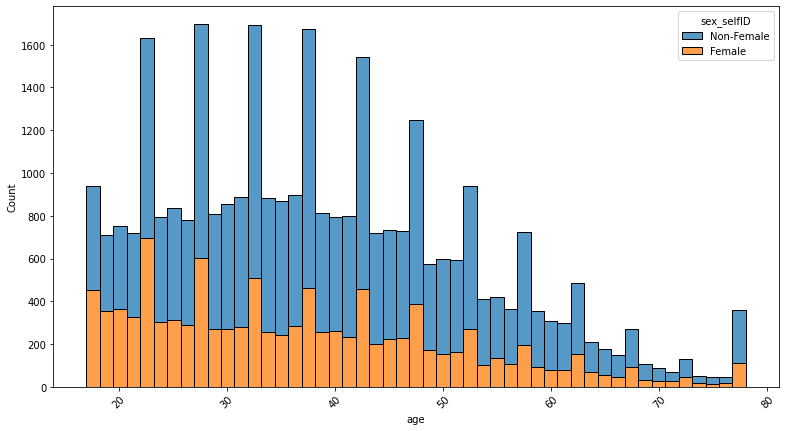

In [18]:
fig1 = plt.figure(figsize=(13,7)) 
t1 = plt.xticks(rotation=45)
sns.histplot(data=df, x="age", hue='sex_selfID',  multiple="stack")

Majority of values comes from Bachelors, HS-grad, and some-college. There is a huge difference between the amount of non-females that graduated compared to the females. Some-college seems to be better, with an close equal divide. However, there are many non-females who receive bachelors than females

<AxesSubplot:xlabel='education', ylabel='Count'>

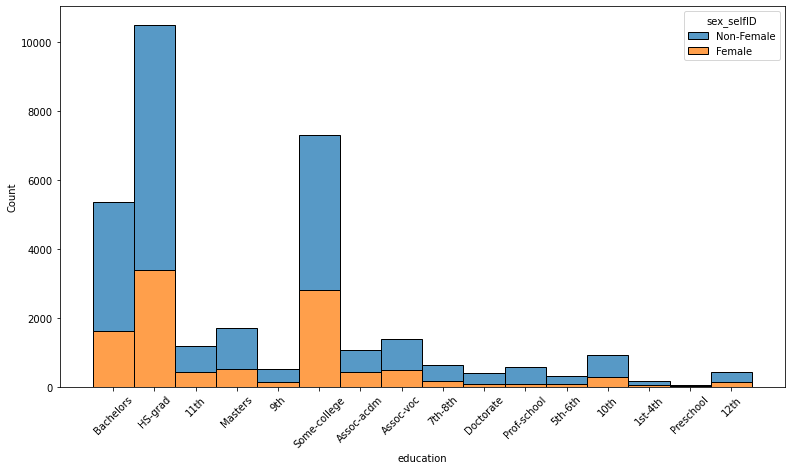

In [19]:
fig2 = plt.figure(figsize=(13,7)) 
t2 = plt.xticks(rotation=45)
sns.histplot(data=df, x="education", hue='sex_selfID',  multiple="stack")

Below, there is an equal divide between the non-females and females in the not-married category. However, there is a large difference in the married category, where non-female takes up a large amount of the data. To me, this is suprising because I would think it would be the other around with Females taking up most of the married.

<AxesSubplot:xlabel='marital-status', ylabel='Count'>

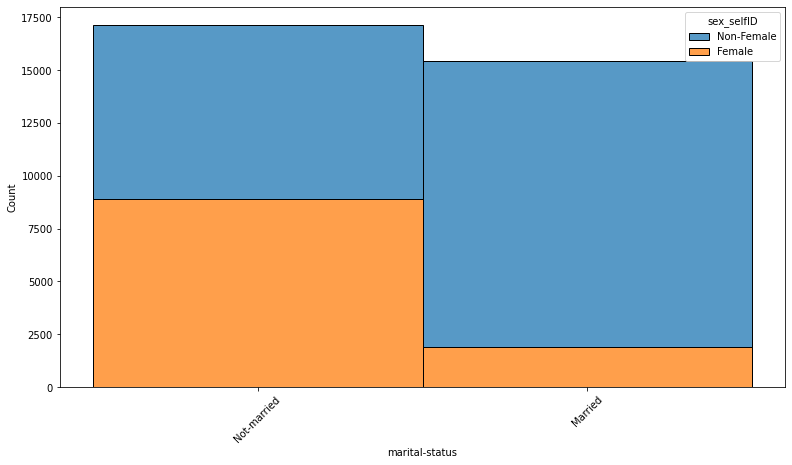

In [20]:
fig3 = plt.figure(figsize=(13,7)) 
t3 = plt.xticks(rotation=45)
sns.histplot(data=df, x="marital-status", hue='sex_selfID',  multiple="stack")

The barplot below shows how race also plays a part in the data distribution. Majority of the data contains those who are white. Every other race is the minority. Even in the white category, non-females still are represented more than females

<AxesSubplot:xlabel='race', ylabel='Count'>

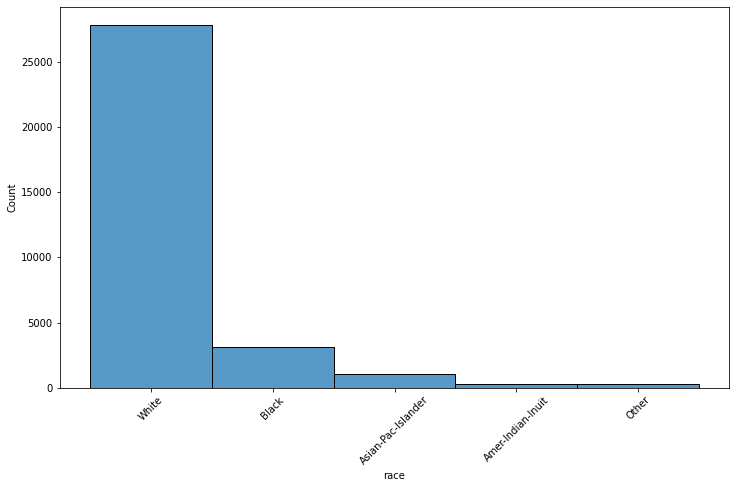

In [21]:
fig4 = plt.figure(figsize=(12,7)) 
t4 = plt.xticks(rotation=45)
sns.histplot(data=df, x='race')

Below, there almost is an equal divide between the non-females and females who make less than or equal to 50k. However, when it comes to above 50k, there is a big difference.

<AxesSubplot:xlabel='income_binary', ylabel='Count'>

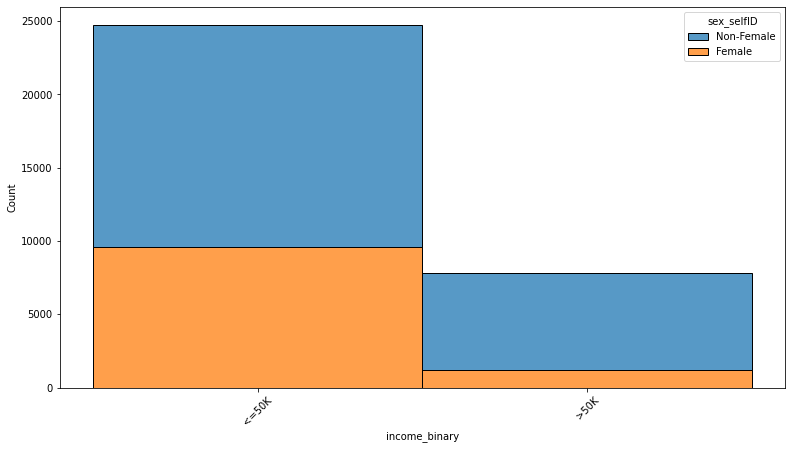

In [22]:
fig5 = plt.figure(figsize=(13,7)) 
t5 = plt.xticks(rotation=45)
sns.histplot(data=df, x="income_binary", hue='sex_selfID',  multiple="stack")

When addressing the imbalance by increasing Married and low-income females, it did not do much with increasing the accuracy of the models. Hence, I decided to keep the class imbalance so there would be less cost computation since there would not be a difference in the results.

# Hot_one encode

categorical values to numerical so it can be used for ML modeling.

In [23]:
#receive what features are objects to hot encode
object_encode = list(df.select_dtypes(include=['object']).columns)
print(object_encode)

# remove these features because they contail null values
object_encode.remove('sex_selfID')

print(object_encode)

['education', 'marital-status', 'relationship', 'race', 'sex_selfID', 'income_binary']
['education', 'marital-status', 'relationship', 'race', 'income_binary']


In [24]:
#hot encoding the top 10 values 
df['education'].unique()

top_education = list(df['education'].value_counts().head(10).index)

for i in top_education:
    
    ## Create columns and their values
    df['education_'+ i] = np.where(df['education']==i,1,0)
    
    
# Remove the original column from your DataFrame df
df.drop(columns = 'education', inplace=True)

# Remove from list to_encode
object_encode.remove('education')

In [25]:
#hot encoding
top_marital = list(df['marital-status'].value_counts().index)

for i in top_marital:
    
    ## Create columns and their values
    df['marital-status_'+ i] = np.where(df['marital-status']==i,1,0)
    
    
# Remove the original column from your DataFrame df
df.drop(columns = 'marital-status', inplace=True)

# Remove from list to_encode
object_encode.remove('marital-status')

In [26]:
#hot_encoding
top_relationship = list(df['relationship'].value_counts().index)

for i in top_relationship:
    
    ## Create columns and their values
    df['relationship_'+ i] = np.where(df['relationship']==i,1,0)
    
    
# Remove the original column from your DataFrame df
df.drop(columns = 'relationship', inplace=True)

# Remove from list to_encode
object_encode.remove('relationship')

In [27]:
#hot encoding
top_race = list(df['race'].value_counts().index)

for i in top_race:
    
    ## Create columns and their values
    df['race_'+ i] = np.where(df['race']==i,1,0)
    
    
# Remove the original column from your DataFrame df
df.drop(columns = 'race', inplace=True)

# Remove from list to_encode
object_encode.remove('race')

In [28]:
#hot encoding
top_income_binary = list(df['income_binary'].value_counts().index)

for i in top_income_binary:
    
    ## Create columns and their values
    df['income_binary_'+ i] = np.where(df['income_binary']==i,1,0)
    
    
# Remove the original column from your DataFrame df
df.drop(columns = 'income_binary', inplace=True)

# Remove from list to_encode
object_encode.remove('income_binary')

In [29]:
df.head()

,age,fnlwgt,education-num,sex_selfID,capital-gain,capital-loss,hours-per-week,education_HS-grad,education_Some-college,education_Bachelors,...,relationship_Unmarried,relationship_Wife,relationship_Other-relative,race_White,race_Black,race_Asian-Pac-Islander,race_Amer-Indian-Inuit,race_Other,income_binary_<=50K,income_binary_>50K
0,39.0,77516,13,Non-Female,2174,0,40.0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,50.0,83311,13,Non-Female,0,0,13.0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,38.0,215646,9,Non-Female,0,0,40.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,53.0,234721,7,Non-Female,0,0,40.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,28.0,338409,13,Female,0,0,40.0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [30]:
# checking if there is any more null values
np.sum(df.isnull(), axis = 0)

age                            0
fnlwgt                         0
education-num                  0
sex_selfID                     0
capital-gain                   0
capital-loss                   0
hours-per-week                 0
education_HS-grad              0
education_Some-college         0
education_Bachelors            0
education_Masters              0
education_Assoc-voc            0
education_11th                 0
education_Assoc-acdm           0
education_10th                 0
education_7th-8th              0
education_Prof-school          0
marital-status_Not-married     0
marital-status_Married         0
relationship_Husband           0
relationship_Not-in-family     0
relationship_Own-child         0
relationship_Unmarried         0
relationship_Wife              0
relationship_Other-relative    0
race_White                     0
race_Black                     0
race_Asian-Pac-Islander        0
race_Amer-Indian-Inuit         0
race_Other                     0
income_bin

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

# Logistic Regression

In [31]:
y = df['sex_selfID']
X = df.drop(columns = 'sex_selfID', axis = 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1234)

In [33]:
#checking the best hyperparameters
param_grid = {'C' : [0.01, 0.1, 1, 10, 100], 'max_iter' : [500, 600, 700, 800]}

model_best = LogisticRegression()

grid = GridSearchCV(model_best, param_grid, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [500, 600, 700, 800]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
# saving the best hyperparameters
print(grid.best_params_)

best_c = grid.best_params_['C']
best_iter = grid.best_params_['max_iter']

{'C': 10, 'max_iter': 500}


In [35]:
#setting up model
model = LogisticRegression(C = best_c, max_iter = best_iter).fit(X,y)

model.fit(X_train, y_train)

probability_predictions = model.predict_proba(X_test)

df_print = pd.DataFrame(probability_predictions, columns = ['Class: Female', 'Class: Non-Female'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

label_predictions = model.predict(X_test)
lr_acc_score = accuracy_score(y_test, label_predictions)
print('The accuracy score for Logistic Regression is: ')
print(lr_acc_score)

Class Prediction Probabilities: 
 Class: Female  Class: Non-Female
      0.319914           0.680086
      0.324719           0.675281
      0.344226           0.655774
      0.167770           0.832230
      0.333346           0.666654
The accuracy score for Logistic Regression is: 
0.6665643229966226


In [36]:
#confusion matrix
c_m = confusion_matrix(y_test, label_predictions, labels = ['Female', 'Non-Female'])

print('Confusion Matrix for the model: ')

pd.DataFrame(c_m, columns = ['Predicted: Female', 'Predicted: Non-Female'], index = ['Actual: Female', 'Actual: Non-Female'])

Confusion Matrix for the model: 


,Predicted: Female,Predicted: Non-Female
Actual: Female,26,1060
Actual: Non-Female,26,2145


# KNN

In [37]:
y = df['sex_selfID']
X = df.drop(columns = 'sex_selfID', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1234)

In [38]:
#I am not going to find the best hyperparameters because after playing around with the values, 3 seems to be the best value.
model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train, y_train)

prediction = model.predict(X_test)

knn_score = accuracy_score(y_test, prediction)
print('The accuracy score is: ')
print(knn_score)

The accuracy score is: 
0.6751611912803193


In [39]:
#confusion matrix
c_m = confusion_matrix(y_test, label_predictions, labels = ['Female', 'Non-Female'])

print('Confusion Matrix for the model: ')

pd.DataFrame(c_m, columns = ['Predicted: Female', 'Predicted: Non-Female'], index = ['Actual: Female', 'Actual: Non-Female'])

Confusion Matrix for the model: 


,Predicted: Female,Predicted: Non-Female
Actual: Female,26,1060
Actual: Non-Female,26,2145


# Decision Trees

In [40]:
y = df['sex_selfID']
X = df.drop(columns = 'sex_selfID', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1234)

In [41]:
#setting up hyperparameter values to check
depth_range = [2**n for n in range(2,5)]
leaf_range = [25*2**n for n in range(0,3)]

param_grid={'max_depth': depth_range, 'min_samples_leaf': leaf_range}

In [42]:
#finding best hyperparameters
print('start')

model = DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid, cv = 5)

grid_search = grid.fit(X_train, y_train)

print("finished")

start
finished


In [43]:
#saving best hyperparameters
print("The best hyperparameters are: ")
print(grid_search.best_params_)
best_max = grid_search.best_params_['max_depth']
best_min = grid_search.best_params_['min_samples_leaf']

The best hyperparameters are: 
{'max_depth': 8, 'min_samples_leaf': 100}


In [45]:
#setting up model
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = best_max, min_samples_leaf = best_min)

model.fit(X_train, y_train)

label_predictions = model.predict(X_test)

dt_acc_score = accuracy_score(y_test, label_predictions)
print('The accuracy score is: ')

print(dt_acc_score)

The accuracy score is: 
0.8130181148295977


In [46]:
#confusion matrix
c_m = confusion_matrix(y_test, label_predictions, labels = ['Female', 'Non-Female'])

print('Confusion Matrix for the model: ')

pd.DataFrame(c_m, columns = ['Predicted: Female', 'Predicted: Non-Female'], index = ['Actual: Female', 'Actual: Non-Female'])

Confusion Matrix for the model: 


,Predicted: Female,Predicted: Non-Female
Actual: Female,712,374
Actual: Non-Female,235,1936


# Random Forest

In [47]:
y = df['sex_selfID']
X = df.drop(columns = 'sex_selfID', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1234)

In [48]:
#setting up hyperparameters
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [49]:
#finding best hyperparameter
print('start')
model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid, cv = 5)

grid_search = grid.fit(X_train, y_train)

print('finish')

start
finish


In [50]:
#saving hyperparameter
print("The best hyperparameters are: ")
print(grid_search.best_params_)
best_n = grid_search.best_params_['n_estimators']

The best hyperparameters are: 
{'n_estimators': 70}


In [51]:
#setting up model
rf_model = RandomForestClassifier(criterion = 'entropy', n_estimators = best_n)

rf_model.fit(X_train, y_train)

label_predictions = rf_model.predict(X_test)

rf_acc_score = accuracy_score(y_test, label_predictions)
print('The accuracy score is: ')

print(rf_acc_score)


The accuracy score is: 
0.802272029474977


In [52]:
#confusion matrix
c_m = confusion_matrix(y_test, label_predictions, labels = ['Female', 'Non-Female'])

print('Confusion Matrix for the model: ')

pd.DataFrame(c_m, columns = ['Predicted: Female', 'Predicted: Non-Female'], index = ['Actual: Female', 'Actual: Non-Female'])

Confusion Matrix for the model: 


,Predicted: Female,Predicted: Non-Female
Actual: Female,762,324
Actual: Non-Female,320,1851


# Gradient Boosting Classifier

In [53]:
#setting up hyperparameters
param_grid = {'max_depth' : depth_range, 'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

Will take a while to calculate

In [54]:
#finding the best hyperparameters
print('start')

model = GradientBoostingClassifier()

grid = GridSearchCV(model, param_grid, cv = 2)

grid_search = grid.fit(X_train, y_train)
print('finish')

start
finish


In [57]:
#saving best hyperparameters
print(grid_search.best_params_)

gbc_depth = grid_search.best_params_['max_depth']

gbc_estimators = grid_search.best_params_['n_estimators']

{'max_depth': 8, 'n_estimators': 80}


In [58]:
#setting up model
model = GradientBoostingClassifier(max_depth = gbc_depth, n_estimators = gbc_estimators)

model.fit(X_train, y_train)

label_predictions = model.predict(X_test)

gbc_acc_score = accuracy_score(y_test, label_predictions)
print('the accuracy score is: ')
print(gbc_acc_score)

the accuracy score is: 
0.8246852932146147


In [59]:
#confusion matrix
c_m = confusion_matrix(y_test, label_predictions, labels = ['Female', 'Non-Female'])

print('Confusion Matrix for the model: ')

pd.DataFrame(c_m, columns = ['Predicted: Female', 'Predicted: Non-Female'], index = ['Actual: Female', 'Actual: Non-Female'])

Confusion Matrix for the model: 


,Predicted: Female,Predicted: Non-Female
Actual: Female,769,317
Actual: Non-Female,254,1917


# Visualize Model Performance

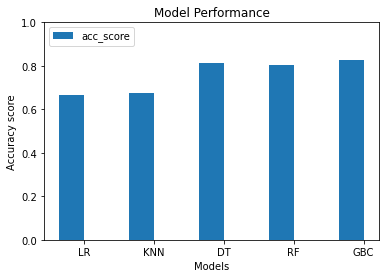

In [60]:
accuracy_results = [lr_acc_score, knn_score, dt_acc_score, rf_acc_score, gbc_acc_score]

labels = ['LR', 'KNN', 'DT', 'RF', 'GBC']

rg = np.arange(5)

width = 0.35

plt.bar(rg, accuracy_results, width, label = 'acc_score')

plt.xticks(rg+width/2, labels)

plt.xlabel("Models")

plt.ylabel("Accuracy score")

plt.ylim([0,1])

plt.title('Model Performance')

plt.legend(loc='upper left', ncol=2)

plt.show()

I chose to use accuracy_score and confusion matrix for evaluation because I thought it would be the easiest for someone who has no knowledge in machine learning to understand what the results are. 

Overall, with the accuracy score, Gradient Boosting Classifier, Random Forest, and Decision Trees performs the best with the score to stay around 80%. Logistic Regression and KNN both stayed in the 60s. This isnt bad, but 80s is the most preferable in this situation.

When looking at the confusion matrix, LR and KNN did not predict the Females well, overall both having 52 predictions for them. The non-females had more predictions. DT, RF, and GBC predicted both the Females and Non-females in a good amount. Predictions for females were in the 1000s, compared to LR and KNN. This is a big improvement.